In [1]:
#%% Import packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score,confusion_matrix

pd.set_option('display.max_columns', 100)  # or 1000
pd.set_option('display.max_rows', 100)  # or 1000

In [19]:
import seaborn_image as isns
isns.set_context(mode="poster", fontfamily='Times New Roman')

In [12]:
cd = os.getcwd()
print(cd)
while cd.split('\\')[-1]!='Algal-bloom-prediction-machine-learning':
    os.chdir('..')
    cd=os.getcwd()
    
os.chdir('Trainning data')
filename='Erken_Observation_df_nowinter_classification2'
all_df=pd.read_csv(filename+'.csv',sep = '\t',parse_dates = ['Date'])
all_df['DO_sur']=all_df['DO_sur']/32
all_df['DO_bot']=all_df['DO_bot']/32

C:\Users\shuli278\Documents\D\PDF_Uppsala\7-Python code of ML algorithm\GitHub\Algal-bloom-prediction-machine-learning\Algal-bloom-prediction-machine-learning\Nutrient prediction\Erken\direct LSTM


In [61]:
os.chdir(cd+'\\Nutrient prediction\Erken\direct LSTM')
LSTM_df=pd.read_csv('Erken_LSTM predicted nutrient and Chl data.csv',parse_dates=['Date'],sep='\t')
LSTM_df['DO_sur']=LSTM_df['DO_sur']/32
LSTM_df['DO_bot']=LSTM_df['DO_bot']/32

In [62]:
os.chdir(cd+'\\Nutrient prediction\Erken\step 1')
GBR_df=pd.read_csv('Erken_GBR_nutrient prediction.csv',parse_dates=['Date'],sep='\t')
GBR_df['DO_sur']=GBR_df['DO_sur']/32
GBR_df['DO_bot']=GBR_df['DO_bot']/32

In [63]:
Date = pd.DataFrame(pd.date_range(start = GBR_df['Date'].iloc[0],
                                  end = GBR_df['Date'].iloc[-1]),
                    columns = ['Date'])
LSTM_df_gap = Date.merge(LSTM_df,how = 'left',on = 'Date')
GBR_df_gap = Date.merge(GBR_df,how = 'left',on = 'Date')

In [89]:
var='DO_bot'
comp=all_df[['Date',var]].dropna().merge(LSTM_df[['Date',var]],on='Date',how='left').merge(GBR_df[['Date',var]],on='Date',how='left')
comp.columns=['Date','Observation','LSTM','GBR']

metrics = pd.DataFrame(columns = ['LSTM','GBR'],index=['MAE','RMSE','R2'])
metrics['LSTM']['RMSE']=round(mean_squared_error(comp['Observation'], comp['LSTM'],squared=False),2)
metrics['LSTM']['MAE']=round(mean_absolute_error(comp['Observation'], comp['LSTM']),2)
metrics['LSTM']['R2']=round(r2_score(comp['Observation'], comp['LSTM']),2)
metrics['GBR']['RMSE']=round(mean_squared_error(comp['Observation'], comp['GBR'],squared=False),2)
metrics['GBR']['MAE']=round(mean_absolute_error(comp['Observation'], comp['GBR']),2)
metrics['GBR']['R2']=round(r2_score(comp['Observation'], comp['GBR']),2)

Text(0.0, 1.0, '(b)')

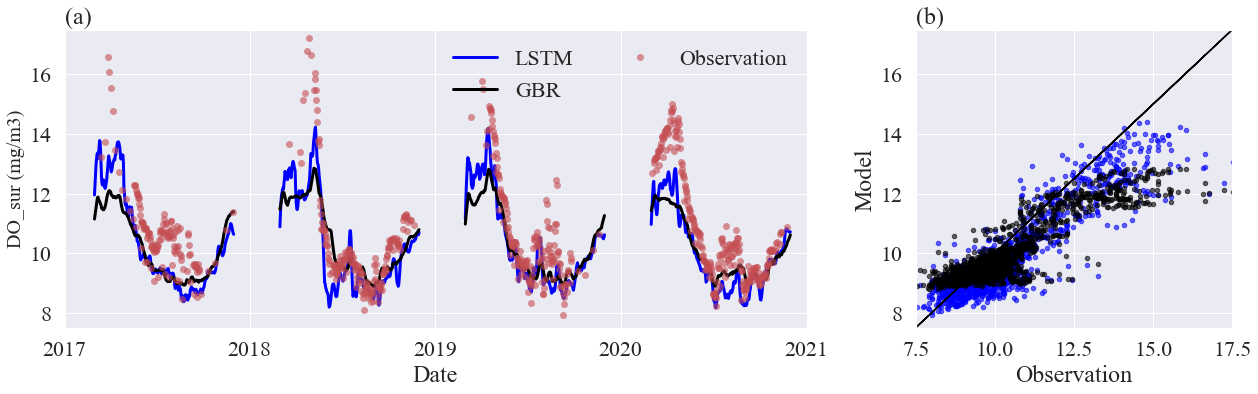

In [79]:
fig=plt.figure(tight_layout='True',figsize = (18,6))
plt.style.use('seaborn')
sns.set_theme(font='Times New Roman',font_scale = 2)
gs = fig.add_gridspec(1, 3)
ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[0, -1:])
LSTM_df_gap.plot(x='Date',y=var,ax=ax1,c='blue',lw=3)
GBR_df_gap.plot(x='Date',y=var,ax=ax1,c='black',lw=3)
all_df.plot(x='Date',y =var,style='ro',alpha = 0.6,ms = 7,ax = ax1)
ax1.set_xlim(pd.Timestamp(2017,1,1),pd.Timestamp(2021,1,1))
ax1.set_ylim(7.5,17.5)
ax1.set_ylabel(var+' (mg/m3)',fontsize=20)
ax1.legend(['LSTM','GBR','Observation'],ncol=2,frameon=False)
ax1.set_title('(a)',loc='left')

comp.plot(x = 'Observation', y = 'LSTM',kind = 'scatter',s = 20,c = 'blue',ax = ax2,alpha=0.6)
comp.plot(x = 'Observation', y = 'GBR',kind = 'scatter',s = 20,c = 'black',ax = ax2,alpha=0.6)
ax2.plot(comp['Observation'],comp['Observation'],lw  =1.5,color = 'black')
#ax2.text(0.5, 0.9, 'R2:{}'.format(round(r2,2)), 
#            horizontalalignment='center',verticalalignment='center', 
#            transform=ax2.transAxes,fontsize='large')
ax2.set_ylim(7.5,17.5)
ax2.set_xlim(7.5,17.5)
ax2.set_ylabel('Model')
ax2.set_title('(b)',loc='left')

In [80]:
os.chdir(cd+'\\Nutrient prediction\Erken')
fig.savefig(var+'.png',dpi=300)